<a href="https://githubtocolab.com/pinshuai/modvis/blob/master/examples/notebooks/plot_surface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Plot surface variables

In [1]:
# skip this if package has already been installed
# !pip install modvis

In [2]:
import os
import modvis.ats_xdmf as xdmf
import modvis.plot_vis_file as pv
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s: %(message)s')

work_dir = f"../../model2/"
run_dir = "3-transient"
model_dir = os.path.join(work_dir, run_dir)
logging.info(f"Loading data from {model_dir}")
# model_dir = "../data/coalcreek"

2025-04-27 22:05:08,966 - root - INFO: Loading data from ../../model2/3-transient


Download the sample data when running on `Google Colab`

In [3]:
# import os
# if not os.path.exists(model_dir):
#   !git clone https://github.com/pinshuai/modvis.git
#   %cd ./modvis/examples/notebooks

# import vis data

In [4]:
visfile = xdmf.VisFile(model_dir, domain='surface', model_time_unit= 'd',
                       load_mesh=True)

In [5]:
# all available variable names
list(visfile.d.keys())

['canopy-cell_volume',
 'canopy-drainage',
 'canopy-evaporation',
 'canopy-fracwet',
 'canopy-interception',
 'canopy-leaf_area_index',
 'canopy-potential_transpiration',
 'canopy-potential_transpiration_mols',
 'canopy-radiation_balance',
 'canopy-temperature',
 'canopy-throughfall_drainage_rain',
 'canopy-throughfall_drainage_snow',
 'canopy-water_content',
 'canopy-water_equivalent',
 'canopy-water_source',
 'canopy-water_source_meters',
 'snow-cell_volume',
 'snow-density',
 'snow-depth',
 'snow-evaporation',
 'snow-expected_temperature',
 'snow-melt',
 'snow-precipitation',
 'snow-radiation_balance',
 'snow-temperature',
 'snow-water_content',
 'snow-water_equivalent',
 'snow-water_source',
 'snow-water_source_meters',
 'surface-air_temperature',
 'surface-albedos.bare_or_water',
 'surface-albedos.snow',
 'surface-area_fractions.bare_or_water',
 'surface-area_fractions.snow',
 'surface-aspect',
 'surface-cell_volume',
 'surface-elevation',
 'surface-emissivities.bare_or_water',
 '

# plot surface ponded depth

In [6]:
time_slice = '2015-6-26'

2025-04-27 22:05:15,139 - root - INFO: No unit convertion.


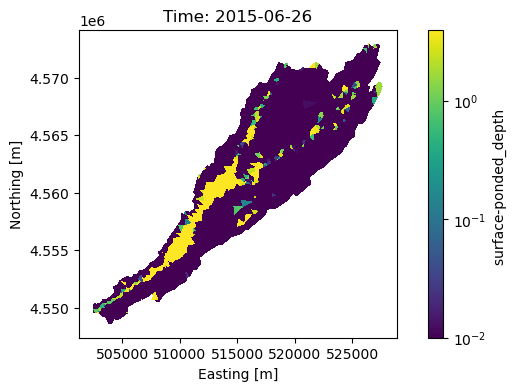

In [7]:
fig, ax, tpc = pv.plot_surface_data(visfile, var_name="surface-ponded_depth", 
                                    log = True, vmin=0.01, vmax=4, 
                                    time_slice= time_slice)

# plot ET

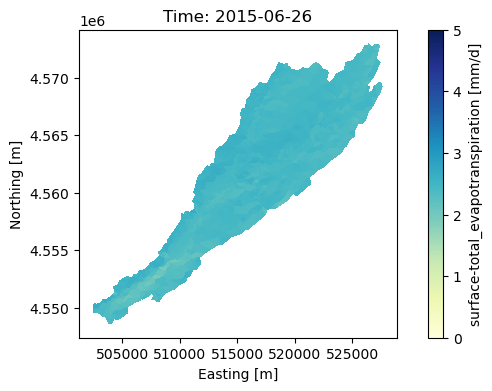

In [8]:
fig, ax, tpc = pv.plot_surface_data(visfile, var_name="surface-total_evapotranspiration", 
                                    log = False, vmin=0, vmax=5, cmap='YlGnBu',
                                    time_slice= time_slice)

# plot snow cover

2025-04-27 22:05:18,510 - root - INFO: No unit convertion.


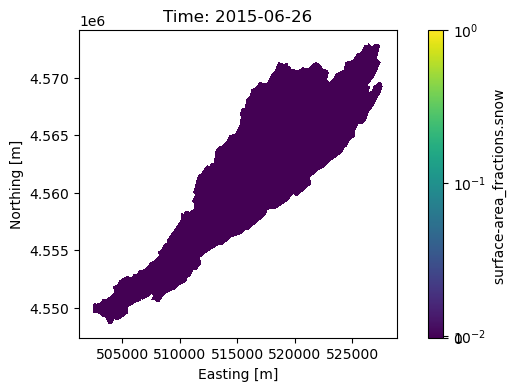

In [9]:
fig, ax, tpc = pv.plot_surface_data(visfile, var_name="surface-area_fractions.snow", 
                                    vmin=0, vmax=1, log=True,
                                    time_slice=time_slice)

# plot SWE

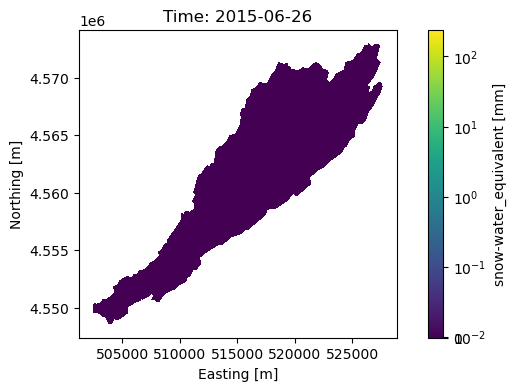

In [10]:
fig, ax, tpc = pv.plot_surface_data(visfile, var_name="snow-water_equivalent", 
                                    vmin=0, vmax=240, log=True,
                                    time_slice=time_slice)

In [16]:
import os
import modvis.ats_xdmf as xdmf

model_dir = "../../model2/3-transient/"
visfile = xdmf.VisFile(model_dir, domain='surface', model_time_unit='d', load_mesh=True)

# Set manually the cell_id you want (similar to how you did with saturation_liquid)
target_cell_id = 22903  # <-- manually pick the correct one

times = visfile.get_times()
et_ats = []
for t in times:
    data = visfile.get('surface-total_evapotranspiration', t)
    et_ats.append(data[target_cell_id])

print("Extracted ATS ET time series successfully!")


AttributeError: 'VisFile' object has no attribute 'get_times'